In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19/.gitignore
/kaggle/input/covid19/README.md
/kaggle/input/covid19/archived_data/README.md
/kaggle/input/covid19/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv
/kaggle/input/covid19/archived_data/archived_time_series/time_series_19-covid-Recovered_archived_0325.csv
/kaggle/input/covid19/archived_data/archived_time_series/time_series_2019-ncov-Recovered.csv
/kaggle/input/covid19/archived_data/archived_time_series/time_series_2019-ncov-Confirmed.csv
/kaggle/input/covid19/archived_data/archived_time_series/.gitignore
/kaggle/input/covid19/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv
/kaggle/input/covid19/archived_data/archived_time_series/README.md
/kaggle/input/covid19/archived_data/archived_time_series/time_series_2019-ncov-Deaths.csv
/kaggle/input/covid19/archived_data/archived_daily_case_updates/02-06-2020_2005.csv
/kaggle/input/covid19/archived_data/archived_daily_case_updates/02-13-2020_2115

In [123]:
file_name = ("/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv")
df = pd.read_csv(file_name)

In [124]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,641,NaN,22154,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176


In [125]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                    int64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [126]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [127]:
df_covid = df.drop(["UID","ISO3"], axis  = 1)

In [128]:
df_covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,641,NaN,22154,6.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176


In [129]:
df.replace(np.nan, 0, inplace = True)
df.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,0.0,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,0.0,3427,4.0,48.662422,42109.0,0.0,3.246753,84000004,USA,578.522286,0.000000
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,641,0.0,22154,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176


In [130]:
df_covid.replace(np.nan, 0, inplace = True)
df_covid.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,0.0,3470,1.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,0.0,3427,4.0,48.662422,42109.0,0.0,3.246753,578.522286,0.000000
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,641,0.0,22154,6.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176


In [131]:
avg_deaths = df_covid["Deaths"].astype('float').mean(axis=0)
print("Average of Deaths:", avg_deaths)
avg_deaths = df_covid["Recovered"].astype('float').mean(axis=0)
print("Average of Recovered:", avg_deaths)
avg_deaths = df_covid["Active"].astype('float').mean(axis=0)
print("Average of Active:", avg_deaths)
avg_deaths = df_covid["Confirmed"].astype('float').mean(axis=0)
print("Average of Confirmed:", avg_deaths)

Average of Deaths: 373.22033898305085
Average of Recovered: 1137.949152542373
Average of Active: 8479.745762711864
Average of Confirmed: 9412.084745762711


In [132]:
df["Deaths"]=df["Deaths"].astype(int, copy=True)

In [133]:
deaths_bins = np.linspace(min(df_covid["Deaths"]), max(df_covid["Deaths"]), 4)
deaths_bins
recovered_bins = np.linspace(min(df_covid["Recovered"]), max(df_covid["Recovered"]), 4)
recovered_bins
confirmed_bins = np.linspace(min(df_covid["Confirmed"]), max(df_covid["Confirmed"]), 4)
confirmed_bins
active_bins = np.linspace(min(df_covid["Active"]), max(df_covid["Active"]), 4)
active_bins

array([-32988.        ,  37890.66666667, 108769.33333333, 179648.        ])

In [134]:
df_covid.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,34.966864,-80.874078,9412.084746,373.220339,1137.949153,8479.745763,61.542373,125.379783,47557.491525,1563.576271,3.069333,892.161822,11.930432
std,13.380095,51.998979,25898.520388,1256.842487,5239.177888,25229.031999,167.964212,178.061738,70450.493915,5614.767503,2.444732,547.632877,8.015009
min,-14.271000,-170.132200,0.000000,0.000000,0.000000,-32988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.385200,-99.611400,728.500000,17.500000,0.000000,712.000000,16.500000,49.050922,10495.000000,39.500000,2.078760,569.237461,6.753974
50%,38.897400,-86.692300,1970.000000,70.000000,0.000000,1874.000000,31.000000,66.698452,24567.000000,282.000000,2.764113,761.753354,11.397059
75%,42.197950,-75.227600,7617.500000,268.000000,235.500000,7301.500000,46.500000,121.978698,52108.500000,1163.000000,3.890118,1159.205550,18.239722
max,61.370700,145.673900,189033.000000,9385.000000,32988.000000,179648.000000,999.000000,1121.124012,461601.000000,42594.000000,18.181818,2737.680538,29.497274


In [135]:
df_covid.corr().style.background_gradient(cmap='Reds')

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Lat,1,-0.426942,0.128527,0.120667,-0.235409,0.184841,-0.502923,0.23009,0.177531,0.107721,0.0872112,0.555667,0.46253
Long_,-0.426942,1,-0.0129461,-0.00399455,0.171023,-0.048153,0.321129,-0.00859417,-0.105644,-0.00599539,0.455914,-0.289955,-0.230522
Confirmed,0.128527,-0.0129461,1,0.99131,0.500854,0.985345,-0.0685949,0.895164,0.909218,0.982056,0.135491,0.502781,0.215955
Deaths,0.120667,-0.00399455,0.99131,1,0.525978,0.974493,-0.0554118,0.879818,0.869614,0.990225,0.150717,0.498125,0.209187
Recovered,-0.235409,0.171023,0.500854,0.525978,1,0.350893,-0.0573981,0.355763,0.390558,0.539014,-0.0784099,0.0867613,-0.0523348
Active,0.184841,-0.048153,0.985345,0.974493,0.350893,1,-0.0593946,0.890962,0.905241,0.965063,0.159882,0.528034,0.244821
FIPS,-0.502923,0.321129,-0.0685949,-0.0554118,-0.0573981,-0.0593946,1,-0.137628,-0.131226,-0.05268,-0.21265,-0.303363,-0.287241
Incident_Rate,0.23009,-0.00859417,0.895164,0.879818,0.355763,0.890962,-0.137628,1,0.765848,0.831059,0.156677,0.676128,0.140677
People_Tested,0.177531,-0.105644,0.909218,0.869614,0.390558,0.905241,-0.131226,0.765848,1,0.877491,0.103813,0.46484,0.288525
People_Hospitalized,0.107721,-0.00599539,0.982056,0.990225,0.539014,0.965063,-0.05268,0.831059,0.877491,1,0.127842,0.46484,0.254737


In [143]:
df_1 = df_covid[["Active", "Confirmed", "Recovered", "Deaths"]].corr().style.background_gradient(cmap='Reds')
df_1


,Active,Confirmed,Recovered,Deaths
Active,1,0.985345,0.350893,0.974493
Confirmed,0.985345,1,0.500854,0.99131
Recovered,0.350893,0.500854,1,0.525978
Deaths,0.974493,0.99131,0.525978,1


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 200224.72233627213)

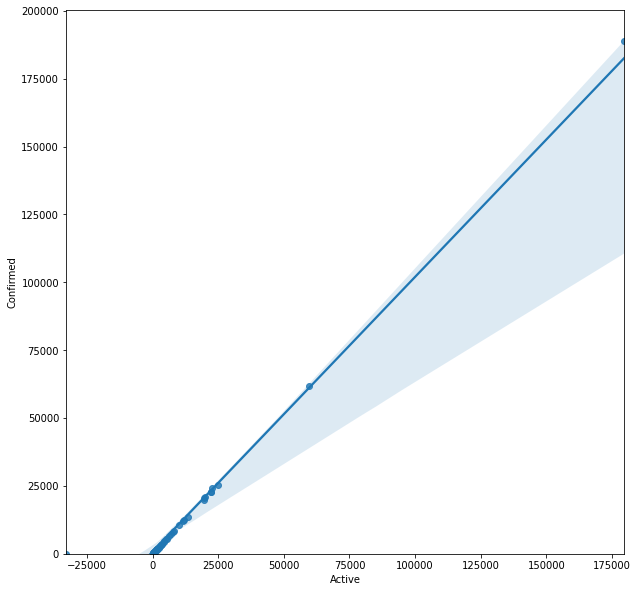

In [156]:
f, ax = plt.subplots(figsize=(10,10))

sns.regplot(x="Active", y="Confirmed", data=df_covid, ax=ax)
plt.ylim(0,)

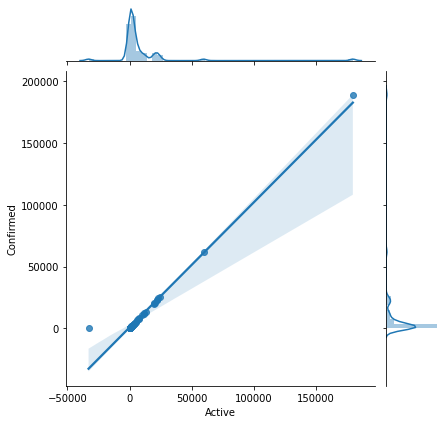

In [157]:
sns.jointplot(x="Active", y="Confirmed", data=df_covid, kind="reg");

In [173]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Active'], df['Confirmed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9853449205075883  with a P-value of P = 1.767166766752059e-45


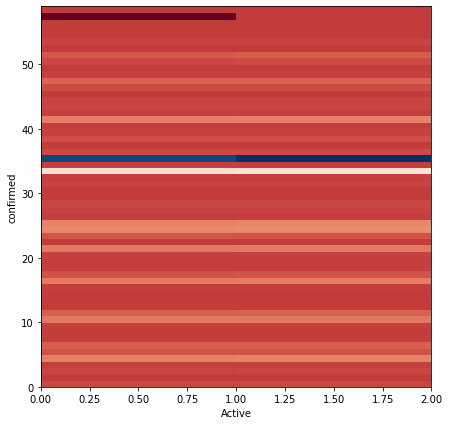

In [186]:
df_2 = df_covid[["Active", "Confirmed"]]
f, ax = plt.subplots(figsize=(7,7))
plt.xlabel("Active")
plt.ylabel("confirmed")
plt.title("Heatmap b/w Active and Confirmed")
plt.pcolor(df_2, cmap = 'RdBu')
plt.show()